In [1]:
# general imports
import os
import binascii
from struct import unpack
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

# python script imports
from read_file_bluesee_1 import *
from classification_algorithm_2 import *

# ML algorithm imports
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import joblib

# Preprocess Demo Data

In [2]:
# extract notebook timestamp and sensor hex data from raw logged file

directory = 'demo'

neck = decode_logged_file(directory, 'neck_demo_2', demo = True)
back = decode_logged_file(directory, 'back_demo_2', demo = True)

neck_decode = decode_hex_value(neck, demo = True)
back_decode = decode_hex_value(back, demo = True)

# create dataframes for each sensor data
neck_df = create_dataframe(neck_decode, demo = True)
back_df = create_dataframe(back_decode, demo = True)

# synchronize sensor data
df_sync = synchronize(neck_df, back_df, demo = True)

df = create_df_model(df_sync, demo = True)

In [3]:
df

,Timestamp,W,X,Y,Z
0,20:27:08.245000,0.736380,0.607231,-0.203068,0.218600
1,20:27:08.290000,0.736681,0.606897,-0.203048,0.218536
2,20:27:08.305000,0.736855,0.606754,-0.202894,0.218493
3,20:27:08.320000,0.736230,0.607492,-0.202750,0.218665
4,20:27:08.335000,0.736449,0.607245,-0.202759,0.218608
...,...,...,...,...,...
2121,20:27:58.935000,0.789937,0.309646,-0.434026,0.302889
2122,20:27:58.937000,0.790013,0.309950,-0.433701,0.302848
2123,20:27:58.973000,0.790112,0.309850,-0.433563,0.302893
2124,20:27:58.975000,0.790122,0.310106,-0.433296,0.302988


In [4]:
df_final = create_df_model_final(df, demo = True)

In [5]:
df_final

,W,X,Y,Z
0,0.736380,0.607231,-0.203068,0.218600
1,0.736681,0.606897,-0.203048,0.218536
2,0.736855,0.606754,-0.202894,0.218493
3,0.736230,0.607492,-0.202750,0.218665
4,0.736449,0.607245,-0.202759,0.218608
...,...,...,...,...
2121,0.789937,0.309646,-0.434026,0.302889
2122,0.790013,0.309950,-0.433701,0.302848
2123,0.790112,0.309850,-0.433563,0.302893
2124,0.790122,0.310106,-0.433296,0.302988


# Load Trained Models

In [13]:
SVC_grid_filename = 'SVC_grid_final.sav'
SVC_grid = joblib.load(SVC_grid_filename)

DTC_grid_filename = 'DTC_grid_final.sav'
DTC_grid = joblib.load(DTC_grid_filename)

# Real-Time Classification Results

In [14]:
def classify(classifier, df):
    df_copy = df.copy(deep=True)
    preds = classifier.predict(df_copy)
    df_copy['Preds'] = preds
    df_copy['Color'] = np.where(df_copy['Preds'] == 1, 'b', 'r')
    return df_copy

In [15]:
SVC_grid_results = classify(SVC_grid, df_final)
#SVC_grid_results[SVC_grid_results['Preds']==1].shape

In [16]:
DTC_grid_results = classify(DTC_grid, df_final)
#DTC_grid_results[DTC_grid_results['Preds']==1].shape

In [17]:
DTC_grid_results

,W,X,Y,Z,Preds,Color
0,0.736380,0.607231,-0.203068,0.218600,1,b
1,0.736681,0.606897,-0.203048,0.218536,1,b
2,0.736855,0.606754,-0.202894,0.218493,1,b
3,0.736230,0.607492,-0.202750,0.218665,1,b
4,0.736449,0.607245,-0.202759,0.218608,1,b
...,...,...,...,...,...,...
2121,0.789937,0.309646,-0.434026,0.302889,1,b
2122,0.790013,0.309950,-0.433701,0.302848,1,b
2123,0.790112,0.309850,-0.433563,0.302893,1,b
2124,0.790122,0.310106,-0.433296,0.302988,1,b


# Real-Time Demo: SVM

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib widget

In [19]:
def save_ani(ani, filename):
    writervideo = FFMpegWriter(fps=30)
    ani.save(filename, writer=writervideo)

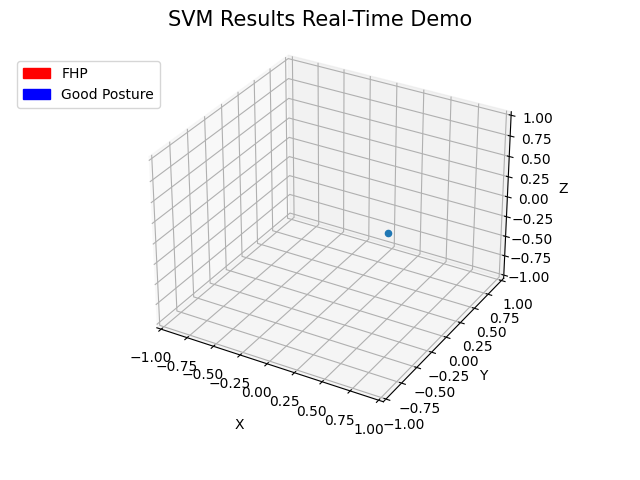

In [13]:
### SVM GRID RESULTS PLOTTED IN REAL-TIME ###

df_test = pd.DataFrame({"Time": list(range(0,len(df))), 
                        "Timestamp": df.Timestamp.values,
                        "X" : SVC_grid_results.X.values,
                        "Y" : SVC_grid_results.Y.values,
                        "Z" : SVC_grid_results.Z.values,
                        "Color": SVC_grid_results.Color.values})

def update_graph(num):
    data=df_test[df_test['Time']==num]
    graph._offsets3d = (data.X, data.Y, data.Z)
    graph.set_color(data.Color)
    title.set_text('Timestamp at Frame {}:'.format(data.Timestamp.to_string()))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_xlabel('', labelpad=10)
fig.suptitle('SVM Results Real-Time Demo', fontsize=15)
fig.subplots_adjust(top=0.95)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

red = mpatches.Patch(color='red', label='FHP')
blue = mpatches.Patch(color='blue', label='Good Posture')
ax.legend(handles=[red, blue], loc='center right', bbox_to_anchor=(0.1, 0.85), fancybox=True)

data=df_test[df_test['Timestamp']==df.Timestamp.values[0]]
graph = ax.scatter(data.X, data.Y, data.Z)

SVC_grid_ani = FuncAnimation(fig, update_graph, frames=len(df_test), interval=.1, blit=False)

plt.show();

In [15]:
save_ani(SVC_grid_ani, 'SVC_Results_Demo_Final.mp4')

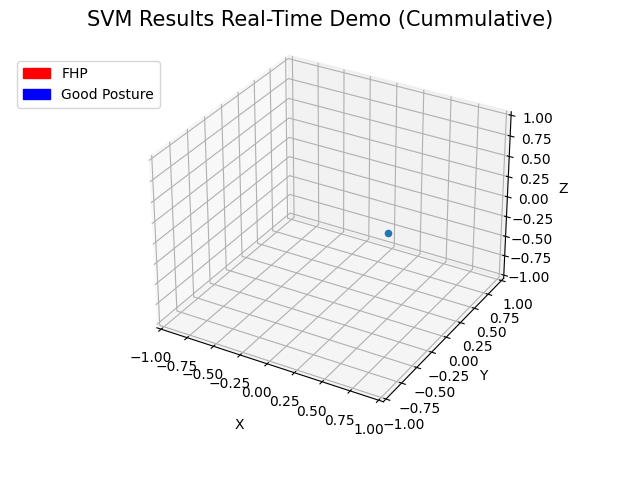

In [12]:
### SVM GRID RESULTS PLOTTED IN REAL-TIME (CUMMULATIVE POINTS) ###

df_test = pd.DataFrame({"Time": list(range(0,len(df))), 
                        "Timestamp": df.Timestamp.values,
                        "X" : SVC_grid_results.X.values,
                        "Y" : SVC_grid_results.Y.values,
                        "Z" : SVC_grid_results.Z.values,
                        "Color": SVC_grid_results.Color.values})

def update_graph_cummulative(num):
    #data=df_test[df_test['Time']<=num]
    graph._offsets3d = (df_test.X[:num], df_test.Y[:num], df_test.Z[:num])
    graph.set_color(df_test.Color[:num])
    #title.set_text('Timestamp at Frame {}:'.format(df_test.Timestamp.to_string()))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_xlabel('', labelpad=10)
fig.suptitle('SVM Results Real-Time Demo (Cummulative)', fontsize=15)
fig.subplots_adjust(top=0.95)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

red = mpatches.Patch(color='red', label='FHP')
blue = mpatches.Patch(color='blue', label='Good Posture')
ax.legend(handles=[red, blue], loc='center right', bbox_to_anchor=(0.1, 0.85), fancybox=True)

data=df_test[df_test['Timestamp']==df.Timestamp.values[0]]
graph = ax.scatter(data.X, data.Y, data.Z)

SVC_grid_ani_2 = FuncAnimation(fig, update_graph_cummulative, frames=len(df_test), interval=.1, blit=False)

plt.show();

In [15]:
save_ani(SVC_grid_ani_2, 'SVC_Results_Demo_Cummulative_Final.mp4')

# Real-Time Demo: Decision Tree

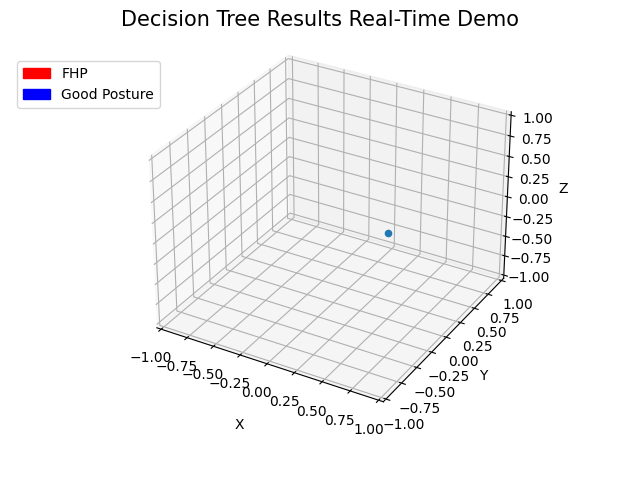

In [14]:
### DECISION TREE GRID RESULTS PLOTTED IN REAL-TIME ###

df_test = pd.DataFrame({"Time": list(range(0,len(df))), 
                        "Timestamp": df.Timestamp.values,
                        "X" : DTC_grid_results.X.values,
                        "Y" : DTC_grid_results.Y.values,
                        "Z" : DTC_grid_results.Z.values,
                        "Color": DTC_grid_results.Color.values})

def update_graph(num):
    data=df_test[df_test['Time']==num]
    graph._offsets3d = (data.X, data.Y, data.Z)
    graph.set_color(data.Color)
    title.set_text('Timestamp at Frame {}:'.format(data.Timestamp.to_string()))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_xlabel('', labelpad=10)
fig.suptitle('Decision Tree Results Real-Time Demo', fontsize=15)
fig.subplots_adjust(top=0.95)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

red = mpatches.Patch(color='red', label='FHP')
blue = mpatches.Patch(color='blue', label='Good Posture')
ax.legend(handles=[red, blue], loc='center right', bbox_to_anchor=(0.1, 0.85), fancybox=True)

data=df_test[df_test['Timestamp']==df.Timestamp.values[0]]
graph = ax.scatter(data.X, data.Y, data.Z)

DTC_grid_ani = FuncAnimation(fig, update_graph, frames=len(df_test), interval=.1, blit=False)

plt.show();

In [15]:
save_ani(DTC_grid_ani, 'DTC_Results_Demo_Final.mp4')

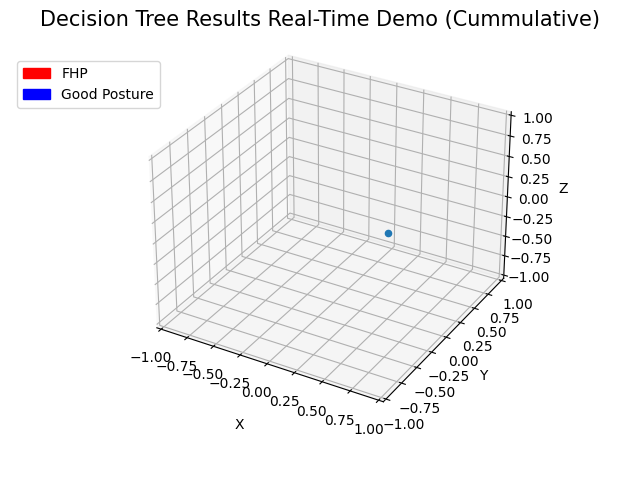

In [20]:
### DTC GRID RESULTS PLOTTED IN REAL-TIME (CUMMULATIVE POINTS) ###

df_test = pd.DataFrame({"Time": list(range(0,len(df))), 
                        "Timestamp": df.Timestamp.values,
                        "X" : DTC_grid_results.X.values,
                        "Y" : DTC_grid_results.Y.values,
                        "Z" : DTC_grid_results.Z.values,
                        "Color": DTC_grid_results.Color.values})

def update_graph_cummulative(num):
    #data=df_test[df_test['Time']<=num]
    graph._offsets3d = (df_test.X[:num], df_test.Y[:num], df_test.Z[:num])
    graph.set_color(df_test.Color[:num])
    #title.set_text('Timestamp at Frame {}:'.format(df_test.Timestamp.to_string()))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_xlabel('', labelpad=10)
fig.suptitle('Decision Tree Results Real-Time Demo (Cummulative)', fontsize=15)
fig.subplots_adjust(top=0.95)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

red = mpatches.Patch(color='red', label='FHP')
blue = mpatches.Patch(color='blue', label='Good Posture')
ax.legend(handles=[red, blue], loc='center right', bbox_to_anchor=(0.1, 0.85), fancybox=True)

data=df_test[df_test['Timestamp']==df.Timestamp.values[0]]
graph = ax.scatter(data.X, data.Y, data.Z)

DTC_grid_ani_2 = FuncAnimation(fig, update_graph_cummulative, frames=len(df_test), interval=.1, blit=False)

plt.show();

In [21]:
save_ani(DTC_grid_ani_2, 'DTC_Results_Demo_Cummulative_Final.mp4')